In [1]:
import sys

# setting path
sys.path.append('..')

In [3]:
# local package
import classified

In [289]:
# outside package
import requests
import pandas as pd
import time
import json
from multiprocessing.dummy import Pool
import numpy as np

# Matches Data

## Fetch Matches Data

In [5]:
def use_api(address, params=None, method="get"):
    if params is None:
        params = {"api_key": classified.API_KEY}
    else:
        params["api_key"] = classified.API_KEY
    method = getattr(requests, method)
    return method(address, params=params).json()

In [5]:
demo1 = use_api("https://api.opendota.com/api/proMatches")
demo1 = pd.DataFrame(demo1)

In [6]:
demo1.head()

,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
0,6985701296,1587,1674598654,8849837.0,FALL VICTIMS,8849833.0,VERTEX PACK,14933,Dota 2 Space League,743781,1,20,30,False
1,6985689589,1715,1674597552,8255756.0,Evil Geniuses,7391077.0,Thunder Awaken,14886,DPC 2023 SA Winter Tour Division I – presented...,743771,1,39,13,True
2,6985682250,2118,1674596995,8606828.0,Wildcard,8680612.0,Dreamers Esports,14783,EPL World Series: America 2022-2023 Season,743758,1,30,33,False
3,6985662794,1999,1674595567,8849833.0,VERTEX PACK,8849837.0,FALL VICTIMS,14933,Dota 2 Space League,743781,1,36,19,True
4,6985639924,1968,1674593847,8680612.0,Dreamers Esports,8606828.0,Wildcard,14783,EPL World Series: America 2022-2023 Season,743758,1,12,29,False


In [7]:
demo2 = use_api("https://api.opendota.com/api/matches/{}".format(6897941675))

In [9]:
demo2

{'match_id': 6897941675,
 'barracks_status_dire': 51,
 'barracks_status_radiant': 63,
 'chat': [{'time': -54,
   'type': 'chatwheel',
   'key': '581',
   'slot': 9,
   'player_slot': 132},
  {'time': -51,
   'type': 'chatwheel',
   'key': '581',
   'slot': 9,
   'player_slot': 132},
  {'time': -36,
   'type': 'chatwheel',
   'key': '583',
   'slot': 6,
   'player_slot': 129},
  {'time': 8, 'type': 'chatwheel', 'key': '7', 'slot': 1, 'player_slot': 1},
  {'time': 9, 'type': 'chatwheel', 'key': '11', 'slot': 1, 'player_slot': 1},
  {'time': 16, 'type': 'chatwheel', 'key': '7', 'slot': 1, 'player_slot': 1},
  {'time': 165, 'type': 'chatwheel', 'key': '7', 'slot': 1, 'player_slot': 1},
  {'time': 292, 'type': 'chatwheel', 'key': '7', 'slot': 1, 'player_slot': 1},
  {'time': 292, 'type': 'chatwheel', 'key': '7', 'slot': 1, 'player_slot': 1},
  {'time': 440,
   'type': 'chatwheel',
   'key': '581',
   'slot': 9,
   'player_slot': 132},
  {'time': 445, 'type': 'chatwheel', 'key': '7', 'slot':

In [9]:
demo3 = use_api("https://api.opendota.com/api/heroes/1/matches")

In [10]:
demo3

[{'match_id': 6983772475,
  'start_time': 1674486703,
  'duration': 1231,
  'radiant_win': False,
  'leagueid': 14845,
  'league_name': 'Neon League',
  'radiant': True,
  'player_slot': 128,
  'account_id': 1041276674,
  'kills': 7,
  'deaths': 1,
  'assists': 7},
 {'match_id': 6983215361,
  'start_time': 1674457386,
  'duration': 1663,
  'radiant_win': True,
  'leagueid': 14960,
  'league_name': 'Golden Age',
  'radiant': False,
  'player_slot': 132,
  'account_id': 170267293,
  'kills': 4,
  'deaths': 7,
  'assists': 2},
 {'match_id': 6982393921,
  'start_time': 1674403004,
  'duration': 1799,
  'radiant_win': True,
  'leagueid': 12903,
  'league_name': 'YouTube SIVVIT - Big Russian Show',
  'radiant': True,
  'player_slot': 2,
  'account_id': 371293069,
  'kills': 17,
  'deaths': 1,
  'assists': 7},
 {'match_id': 6982133532,
  'start_time': 1674393982,
  'duration': 2002,
  'radiant_win': True,
  'leagueid': 14894,
  'league_name': 'Ancients League',
  'radiant': False,
  'player_s

In [11]:
pro_matches = []

In [14]:
for i in range(0, 10000, 1000):
    result = use_api(
        "https://api.opendota.com/api/explorer",
        params={"sql":
                    """
                        SELECT
                            matches.match_id
                        FROM
                            matches
                            JOIN match_patch USING ( match_id )
                            JOIN leagues USING ( leagueid )
                            JOIN player_matches USING ( match_id )
                            JOIN heroes ON heroes.id = player_matches.hero_id
                            LEFT JOIN notable_players ON notable_players.account_id = player_matches.account_id
                            LEFT JOIN teams USING ( team_id )
                        WHERE
                        TRUE
                            AND match_patch.patch >= '7.28'
                            AND leagues.tier = 'professional'
                        GROUP BY
                            matches.match_id
                        ORDER BY
                            matches.match_id NULLS LAST
                            LIMIT 1000 OFFSET {}
                    """.format(i)}
    )
    pro_matches += result["rows"]
    print("First {} data fetched.".format(i + 1000))
    time.sleep(1)

First 1000 data fetched.
First 2000 data fetched.
First 3000 data fetched.
First 4000 data fetched.
First 5000 data fetched.
First 6000 data fetched.
First 7000 data fetched.
First 8000 data fetched.
First 9000 data fetched.
First 10000 data fetched.


In [15]:
pro_matches = [i["match_id"] for i in pro_matches]

In [25]:
data = []

In [26]:
def get_match_data(match_id):
    kept_keys = ["match_id", "radiant_win", "region", "patch", "picks_bans"]
    try:
        result = use_api("https://api.opendota.com/api/matches/{match_id}".format(match_id=match_id))
        data.append({k: result[k] for k in kept_keys})
        time.sleep(1)
    except Exception:
        pass

In [27]:
pool = Pool(5)
pool.map(get_match_data, pro_matches)
len(data)

9383

In [250]:
pd.DataFrame(data).head()

,match_id,radiant_win,region,patch,first_pick_team,selection_0,selection_1,selection_2,selection_3,selection_4,...,selection_14,selection_15,selection_16,selection_17,selection_18,selection_19,selection_20,selection_21,selection_22,selection_23
0,5746455668,False,3,47,1,85,91,79,41,43,...,47,20,64,94,128,65,4,33,28,55
1,5795993534,True,3,47,0,65,88,32,111,13,...,38,51,12,4,47,54,46,11,55,114
2,5883814830,True,5,47,1,102,88,73,13,86,...,129,121,110,32,113,106,126,17,39,74
3,5860105982,True,17,47,0,38,88,9,13,111,...,102,42,126,11,70,29,12,60,104,18
4,5831784791,True,3,47,1,7,90,88,91,111,...,86,107,94,1,28,49,2,22,55,104


In [29]:
with open("../data/raw_data/data.json", "w") as f:
    json.dump({"data": data}, f)

## Process Pro Matches Data

In [253]:
with open("../data/raw_data/data.json", "r") as f:
    data = json.load(f)["data"]

In [255]:
data[0]["picks_bans"][0]

{'is_pick': False,
 'hero_id': 85,
 'team': 1,
 'order': 0,
 'ord': 0,
 'match_id': 5746455668}

In [256]:
data = pd.DataFrame(data).dropna()
data.head()

,match_id,radiant_win,region,patch,picks_bans
0,5746455668,False,3,47,"[{'is_pick': False, 'hero_id': 85, 'team': 1, ..."
1,5795993534,True,3,47,"[{'is_pick': False, 'hero_id': 65, 'team': 0, ..."
2,5883814830,True,5,47,"[{'is_pick': False, 'hero_id': 102, 'team': 1,..."
3,5860105982,True,17,47,"[{'is_pick': False, 'hero_id': 38, 'team': 0, ..."
4,5831784791,True,3,47,"[{'is_pick': False, 'hero_id': 7, 'team': 1, '..."


In [257]:
data["first_pick_team"] = data.picks_bans.apply(lambda x: x[0]["team"])
data.head()

,match_id,radiant_win,region,patch,picks_bans,first_pick_team
0,5746455668,False,3,47,"[{'is_pick': False, 'hero_id': 85, 'team': 1, ...",1
1,5795993534,True,3,47,"[{'is_pick': False, 'hero_id': 65, 'team': 0, ...",0
2,5883814830,True,5,47,"[{'is_pick': False, 'hero_id': 102, 'team': 1,...",1
3,5860105982,True,17,47,"[{'is_pick': False, 'hero_id': 38, 'team': 0, ...",0
4,5831784791,True,3,47,"[{'is_pick': False, 'hero_id': 7, 'team': 1, '...",1


In [258]:
data.picks_bans = data.picks_bans.apply(lambda x: [i["hero_id"] for i in x])
data = data[data.picks_bans.apply(lambda x: len(x)) == 24]
data.head()

,match_id,radiant_win,region,patch,picks_bans,first_pick_team
0,5746455668,False,3,47,"[85, 91, 79, 41, 43, 107, 51, 10, 53, 68, 22, ...",1
1,5795993534,True,3,47,"[65, 88, 32, 111, 13, 30, 78, 86, 70, 95, 93, ...",0
2,5883814830,True,5,47,"[102, 88, 73, 13, 86, 103, 29, 91, 93, 68, 10,...",1
3,5860105982,True,17,47,"[38, 88, 9, 13, 111, 26, 107, 129, 77, 10, 43,...",0
4,5831784791,True,3,47,"[7, 90, 88, 91, 111, 13, 65, 102, 38, 27, 33, ...",1


In [259]:
picks_bans = data.picks_bans.apply(pd.Series)
picks_bans.columns = ["selection_{}".format(i) for i in range(24)]
picks_bans.head()

,selection_0,selection_1,selection_2,selection_3,selection_4,selection_5,selection_6,selection_7,selection_8,selection_9,...,selection_14,selection_15,selection_16,selection_17,selection_18,selection_19,selection_20,selection_21,selection_22,selection_23
0,85,91,79,41,43,107,51,10,53,68,...,47,20,64,94,128,65,4,33,28,55
1,65,88,32,111,13,30,78,86,70,95,...,38,51,12,4,47,54,46,11,55,114
2,102,88,73,13,86,103,29,91,93,68,...,129,121,110,32,113,106,126,17,39,74
3,38,88,9,13,111,26,107,129,77,10,...,102,42,126,11,70,29,12,60,104,18
4,7,90,88,91,111,13,65,102,38,27,...,86,107,94,1,28,49,2,22,55,104


In [260]:
data = data.drop("picks_bans", axis=1)
data = pd.concat([data, picks_bans], axis=1)

,match_id,radiant_win,region,patch,first_pick_team,selection_0,selection_1,selection_2,selection_3,selection_4,...,selection_14,selection_15,selection_16,selection_17,selection_18,selection_19,selection_20,selection_21,selection_22,selection_23
0,5746455668,False,3,47,1,85,91,79,41,43,...,47,20,64,94,128,65,4,33,28,55
1,5795993534,True,3,47,0,65,88,32,111,13,...,38,51,12,4,47,54,46,11,55,114
2,5883814830,True,5,47,1,102,88,73,13,86,...,129,121,110,32,113,106,126,17,39,74
3,5860105982,True,17,47,0,38,88,9,13,111,...,102,42,126,11,70,29,12,60,104,18
4,5831784791,True,3,47,1,7,90,88,91,111,...,86,107,94,1,28,49,2,22,55,104


In [268]:
data.to_csv("../data/processed_data/data.json")

In [270]:
data = pd.read_csv("../data/processed_data/data.json", index_col=0)
data.head()

,match_id,radiant_win,region,patch,first_pick_team,selection_0,selection_1,selection_2,selection_3,selection_4,...,selection_14,selection_15,selection_16,selection_17,selection_18,selection_19,selection_20,selection_21,selection_22,selection_23
0,5746455668,False,3,47,1,85,91,79,41,43,...,47,20,64,94,128,65,4,33,28,55
1,5795993534,True,3,47,0,65,88,32,111,13,...,38,51,12,4,47,54,46,11,55,114
2,5883814830,True,5,47,1,102,88,73,13,86,...,129,121,110,32,113,106,126,17,39,74
3,5860105982,True,17,47,0,38,88,9,13,111,...,102,42,126,11,70,29,12,60,104,18
4,5831784791,True,3,47,1,7,90,88,91,111,...,86,107,94,1,28,49,2,22,55,104


# Heroes Data

## Fetch Heroes Data

In [271]:
heroes_data = pd.DataFrame(use_api("https://api.opendota.com/api/heroes"))
heroes_data = heroes_data[["id", "localized_name"]]
heroes_data.columns = ["id", "name"]
heroes_data.head()

,id,name
0,1,Anti-Mage
1,2,Axe
2,3,Bane
3,4,Bloodseeker
4,5,Crystal Maiden


## Fetch Matchup Data

In [126]:
matchup_data = heroes_data["id"].apply(lambda x: use_api("https://api.opendota.com/api/heroes/{}/matchups".format(x)))
matchup_data.head()

0    [{'hero_id': 16, 'games_played': 188, 'wins': ...
1    [{'hero_id': 86, 'games_played': 145, 'wins': ...
2    [{'hero_id': 129, 'games_played': 512, 'wins':...
3    [{'hero_id': 120, 'games_played': 419, 'wins':...
4    [{'hero_id': 86, 'games_played': 493, 'wins': ...
Name: id, dtype: object

## Combine and Process Data

In [272]:
columns_to_add = [{"win_rate": np.nan}]
for i in heroes_data["id"].to_list():
    columns_to_add.append({"against_hero_{}".format(int(i)): np.nan})
heroes_data = pd.concat([heroes_data, pd.DataFrame(columns_to_add)], axis=1)
heroes_data.drop(123, axis=0, inplace=True)
heroes_data["id"] = heroes_data["id"].astype(int)
heroes_data.head()

,id,name,win_rate,against_hero_1,against_hero_2,against_hero_3,against_hero_4,against_hero_5,against_hero_6,against_hero_7,...,against_hero_119,against_hero_120,against_hero_121,against_hero_123,against_hero_126,against_hero_128,against_hero_129,against_hero_135,against_hero_136,against_hero_137
0,1,Anti-Mage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Axe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Bane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bloodseeker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Crystal Maiden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
def add_to_heroes_data(row):
    heroes_data.loc[i, "against_hero_{}".format(int(row.hero_id))] = row.win_rate


for i in range(123):
    df = pd.DataFrame(matchup_data.iloc[i])
    df["win_rate"] = df["wins"] / df["games_played"]
    heroes_data.loc[i, "win_rate"] = df["wins"].sum() / df["games_played"].sum()
    df[["hero_id", "win_rate"]].apply(add_to_heroes_data, axis=1)

In [274]:
heroes_data.head()

,id,name,win_rate,against_hero_1,against_hero_2,against_hero_3,against_hero_4,against_hero_5,against_hero_6,against_hero_7,...,against_hero_119,against_hero_120,against_hero_121,against_hero_123,against_hero_126,against_hero_128,against_hero_129,against_hero_135,against_hero_136,against_hero_137
0,1,Anti-Mage,0.489100,NaN,0.566667,0.464789,0.447368,0.441860,0.608696,0.588235,...,0.545455,0.500000,0.535433,0.381579,0.477273,0.460526,0.413793,0.428571,0.520000,0.521739
1,2,Axe,0.485514,0.433333,NaN,0.474576,0.576923,0.471264,0.507937,0.666667,...,0.473684,0.482143,0.474227,0.508475,0.486486,0.490196,0.544828,0.419355,0.471429,0.392857
2,3,Bane,0.552398,0.535211,0.525424,NaN,0.605042,0.576087,0.495413,0.562500,...,0.516129,0.530928,0.592018,0.617925,0.616822,0.595745,0.583984,0.547945,0.490066,0.589744
3,4,Bloodseeker,0.496582,0.552632,0.423077,0.394958,NaN,0.589147,0.480769,0.490909,...,0.480000,0.515513,0.620321,0.537313,0.567164,0.506550,0.517647,0.517413,0.483871,0.387755
4,5,Crystal Maiden,0.496833,0.558140,0.528736,0.423913,0.410853,NaN,0.491124,0.461538,...,0.519481,0.507519,0.550296,0.516807,0.400000,0.482085,0.538462,0.492593,0.490141,0.514851


In [275]:
heroes_data.to_csv("../data/processed_data/heroes_data.csv")

In [276]:
heroes_data = pd.read_csv("../data/processed_data/heroes_data.csv", index_col=0)
heroes_data.head()

,id,name,win_rate,against_hero_1,against_hero_2,against_hero_3,against_hero_4,against_hero_5,against_hero_6,against_hero_7,...,against_hero_119,against_hero_120,against_hero_121,against_hero_123,against_hero_126,against_hero_128,against_hero_129,against_hero_135,against_hero_136,against_hero_137
0,1,Anti-Mage,0.489100,NaN,0.566667,0.464789,0.447368,0.441860,0.608696,0.588235,...,0.545455,0.500000,0.535433,0.381579,0.477273,0.460526,0.413793,0.428571,0.520000,0.521739
1,2,Axe,0.485514,0.433333,NaN,0.474576,0.576923,0.471264,0.507937,0.666667,...,0.473684,0.482143,0.474227,0.508475,0.486486,0.490196,0.544828,0.419355,0.471429,0.392857
2,3,Bane,0.552398,0.535211,0.525424,NaN,0.605042,0.576087,0.495413,0.562500,...,0.516129,0.530928,0.592018,0.617925,0.616822,0.595745,0.583984,0.547945,0.490066,0.589744
3,4,Bloodseeker,0.496582,0.552632,0.423077,0.394958,NaN,0.589147,0.480769,0.490909,...,0.480000,0.515513,0.620321,0.537313,0.567164,0.506550,0.517647,0.517413,0.483871,0.387755
4,5,Crystal Maiden,0.496833,0.558140,0.528736,0.423913,0.410853,NaN,0.491124,0.461538,...,0.519481,0.507519,0.550296,0.516807,0.400000,0.482085,0.538462,0.492593,0.490141,0.514851


In [285]:
heroes_data[["name", "win_rate"]].describe()

,win_rate
count,123.000000
mean,0.498494
std,0.028327
min,0.431899
25%,0.483330
50%,0.496572
75%,0.514233
max,0.581066


<AxesSubplot: ylabel='name'>

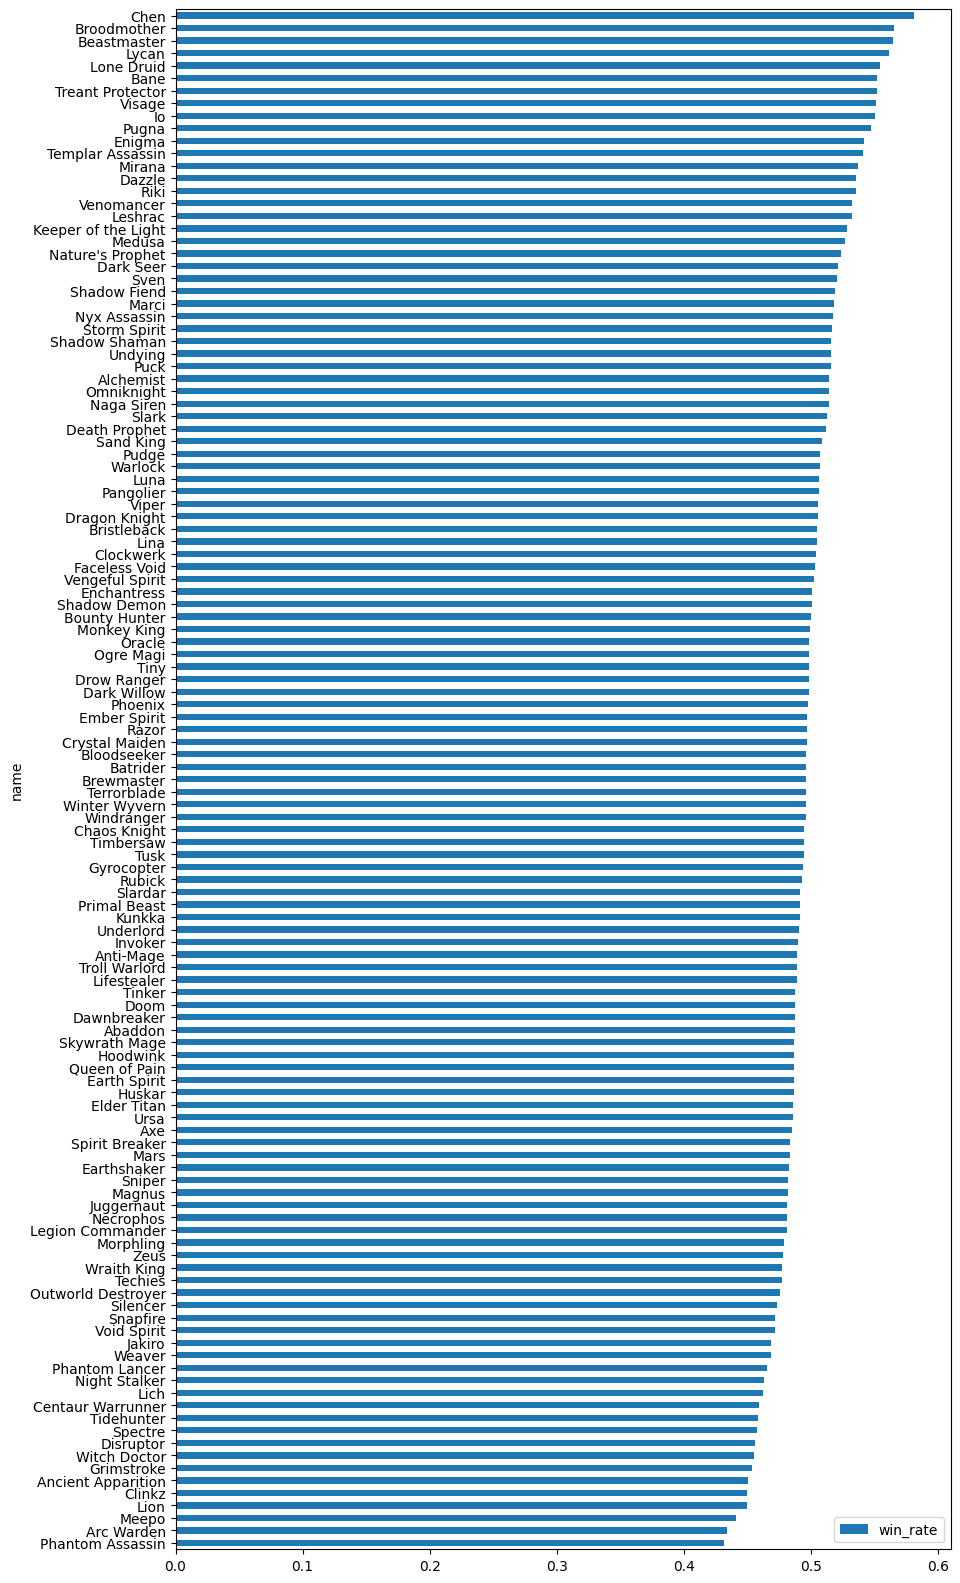

In [306]:
heroes_data[["name", "win_rate"]].sort_values("win_rate").plot.barh(x="name", y="win_rate", figsize=(10,20))